In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Smoothing Noisy Data using:
## 1. bin means
## 2. bin median
## 3. bin boundaries



Index(['Date', 'Temp'], dtype='object')


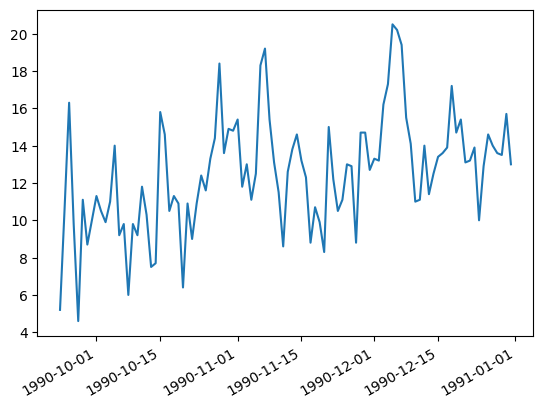

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/PhD/TAShip/IC-272_2023/Tutorials/Tutorial-01/daily-min-temperatures.csv')
print(df.columns)

df_ = df[-100:]

date_time = pd.to_datetime(df_['Date'])

temp = np.array(df_['Temp'])

plt.plot(date_time, temp)
plt.gcf().autofmt_xdate()
plt.show()

In [ ]:
class binning():
    data = []
    bin_size = 0

    def __init__(self, data, bin_size):
        self.data = data
        self.bin_size = bin_size

    # binning by means
    def binning_means(self):
        sorted_idx = np.argsort(self.data)
        sorted_data = sorted(self.data)
        bins = []
        j=0
        for i in range(0, len(sorted_data), self.bin_size):
            if(i+self.bin_size>=len(sorted_data)):
                bins.append(sorted_data[i:])
            else:
                bins.append(sorted_data[i:i+self.bin_size])
        bins = [[np.mean(i)]*len(i) for i in bins]
        flatten_bins = [q for p in bins for q in p]
        reverted_bins = np.zeros(len(sorted_data))
        for i in range(len(sorted_data)):
            reverted_bins[sorted_idx[i]] = flatten_bins[i]
        return reverted_bins

    # binning by median
    def binning_median(self):
        sorted_idx = np.argsort(self.data)
        sorted_data = sorted(self.data)
        bins = []
        for i in range(0, len(sorted_data), self.bin_size):
            if(i+self.bin_size>=len(sorted_data)):
                bins.append(sorted_data[i:])
            else:
                bins.append(sorted_data[i:i+self.bin_size])
        bins = [[np.median(i)]*len(i) for i in bins]
        flatten_bins = [q for p in bins for q in p]
        reverted_bins = np.zeros(len(sorted_data))
        for i in range(len(sorted_data)):
            reverted_bins[sorted_idx[i]] = flatten_bins[i]
        return reverted_bins

    # binning by boundaries
    def binning_boundaries(self):
        sorted_idx = np.argsort(self.data)
        sorted_data = sorted(self.data)
        bins = []
        for i in range(0, len(sorted_data), self.bin_size):
            bins.append(sorted_data[i:i+self.bin_size])
        for i in range(len(bins)):
            for j in range(len(bins[i])):
                if abs(bins[i][j] - bins[i][0]) < abs(bins[i][j] - bins[i][-1]):
                    bins[i][j] = bins[i][0]
                else:
                    bins[i][j] = bins[i][-1]
        flatten_bins = [q for p in bins for q in p]
        reverted_bins = np.zeros(len(sorted_data))
        for i in range(len(sorted_data)):
            reverted_bins[sorted_idx[i]] = flatten_bins[i]
        return reverted_bins

In [ ]:
import matplotlib.pyplot as plt

bin_size = 35
b = binning(temp, bin_size)
mean_binned = b.binning_means()
median_binned = b.binning_median()
boundaries_binned = b.binning_boundaries()

df_binned = pd.DataFrame()
df_binned['Date'] = date_time
df_binned['Temp'] = temp
df_binned['mean_binned'] = np.array(mean_binned).flatten()
df_binned['median_binned'] = np.array(median_binned).flatten()
df_binned['boundaries_binned'] = np.array(boundaries_binned).flatten()
# df_binned.head()
df_binned[:20]

,Date,Temp,mean_binned,median_binned,boundaries_binned
3550,1990-09-23,5.2,9.380000,9.9,4.6
3551,1990-09-24,10.6,9.380000,9.9,11.1
3552,1990-09-25,16.3,15.976667,15.4,14.0
3553,1990-09-26,9.8,9.380000,9.9,11.1
3554,1990-09-27,4.6,9.380000,9.9,4.6
3555,1990-09-28,11.1,9.380000,9.9,11.1
3556,1990-09-29,8.7,9.380000,9.9,11.1
3557,1990-09-30,10.0,9.380000,9.9,11.1
3558,1990-10-01,11.3,12.728571,13.0,11.1
3559,1990-10-02,10.5,9.380000,9.9,11.1


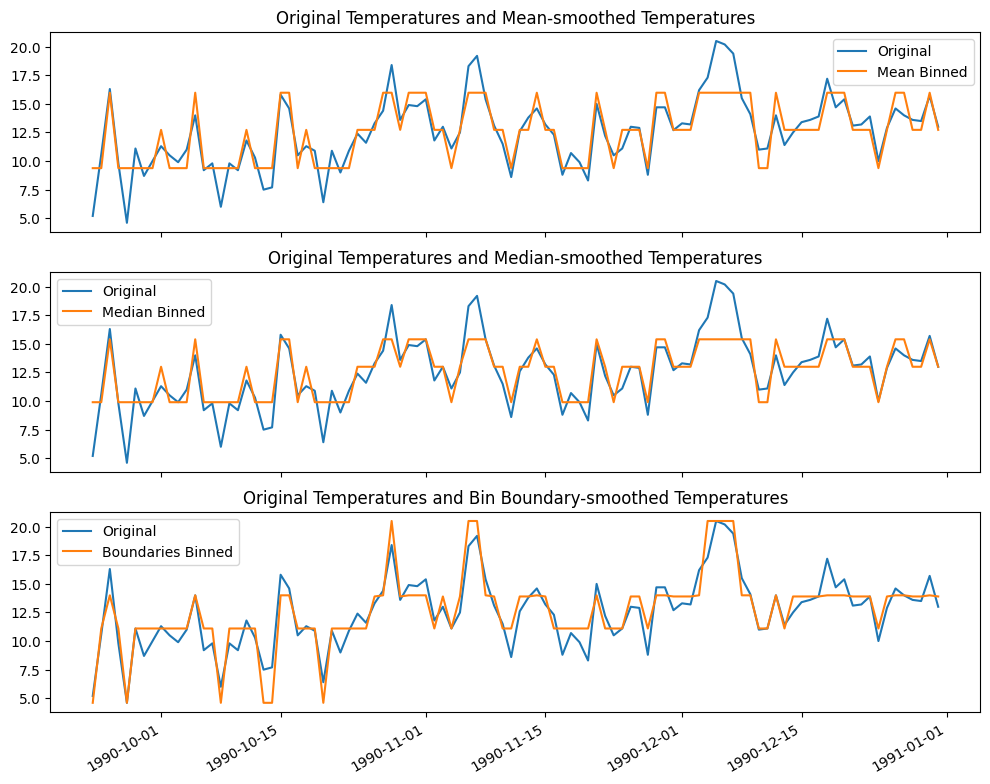

In [ ]:
fig = plt.figure(figsize=(12, 10))

sub1 = fig.add_subplot(311) # instead of plt.subplot(2, 2, 1)
sub1.plot(df_binned['Date'], df_binned['Temp'], label='Original')
sub1.plot(df_binned['Date'], df_binned['mean_binned'], label='Mean Binned')
sub1.set_title('Original Temperatures and Mean-smoothed Temperatures')
plt.legend()


sub2 = fig.add_subplot(312)
sub2.plot(df_binned['Date'], df_binned['Temp'], label='Original')
sub2.plot(df_binned['Date'], df_binned['median_binned'], label='Median Binned')
sub2.set_title('Original Temperatures and Median-smoothed Temperatures')
plt.legend()

sub3 = fig.add_subplot(313)
sub3.plot(df_binned['Date'], df_binned['Temp'], label='Original')
sub3.plot(df_binned['Date'], df_binned['boundaries_binned'], label='Boundaries Binned')
sub3.set_title('Original Temperatures and Bin Boundary-smoothed Temperatures')

plt.gcf().autofmt_xdate()
plt.legend()
plt.show()

# Standardization and Normalization


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df = pd.read_csv('/content/drive/MyDrive/PhD/TAShip/IC-272_2023/Tutorials/Tutorial-01/HousePricePrediction.csv')
print(df.columns)

df_ = df[:100]

df_.head()


Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')


,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [ ]:
# Filling NaN values with colum means
df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].mean(), inplace=True)
df['SalePrice'].fillna(df['SalePrice'].mean(), inplace=True)

### Data Normalization

In [ ]:
def min_max_scaling(column):
    min_val = column.min()
    max_val = column.max()
    scaled_column = (column - min_val) / (max_val - min_val)
    return scaled_column

columns_to_normalize = ['LotArea', 'TotalBsmtSF', 'SalePrice']
data_subset = df[columns_to_normalize]
data_normalized = data_subset.apply(min_max_scaling)

Data normalization can be done through pre-built library functions also

```
from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler()
data_normalized = scaler_minmax.fit_transform(data_subset)
data_normalized = pd.DataFrame(data_normalized, columns=columns_to_normalize)
```



Visualizing Lot Area vs SalesPrice


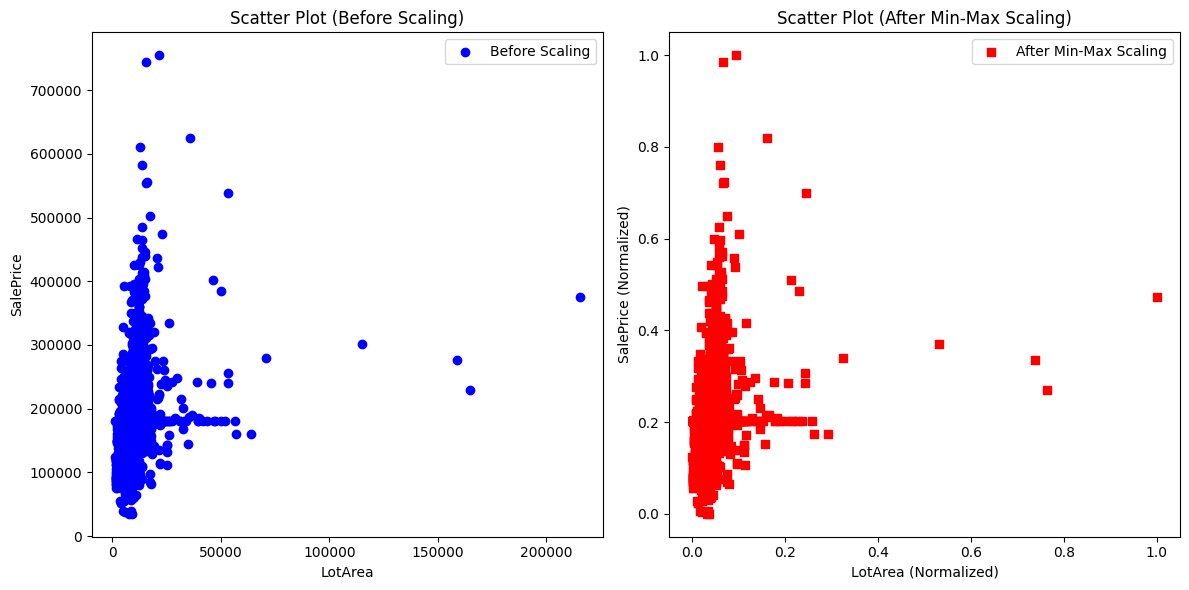

In [ ]:
# Scatter plot before normalization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data_subset['LotArea'], data_subset['SalePrice'], c='b', marker='o', label='Before Scaling')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.title('Scatter Plot (Before Scaling)')
plt.legend()

# Scatter plot after normalization
plt.subplot(1, 2, 2)
plt.scatter(data_normalized['LotArea'], data_normalized['SalePrice'], c='r', marker='s', label='After Min-Max Scaling')
plt.xlabel('LotArea (Normalized)')
plt.ylabel('SalePrice (Normalized)')
plt.title('Scatter Plot (After Min-Max Scaling)')
plt.legend()

plt.tight_layout()
plt.show()

Visualizing TotalBsmtSF vs SalesPrice


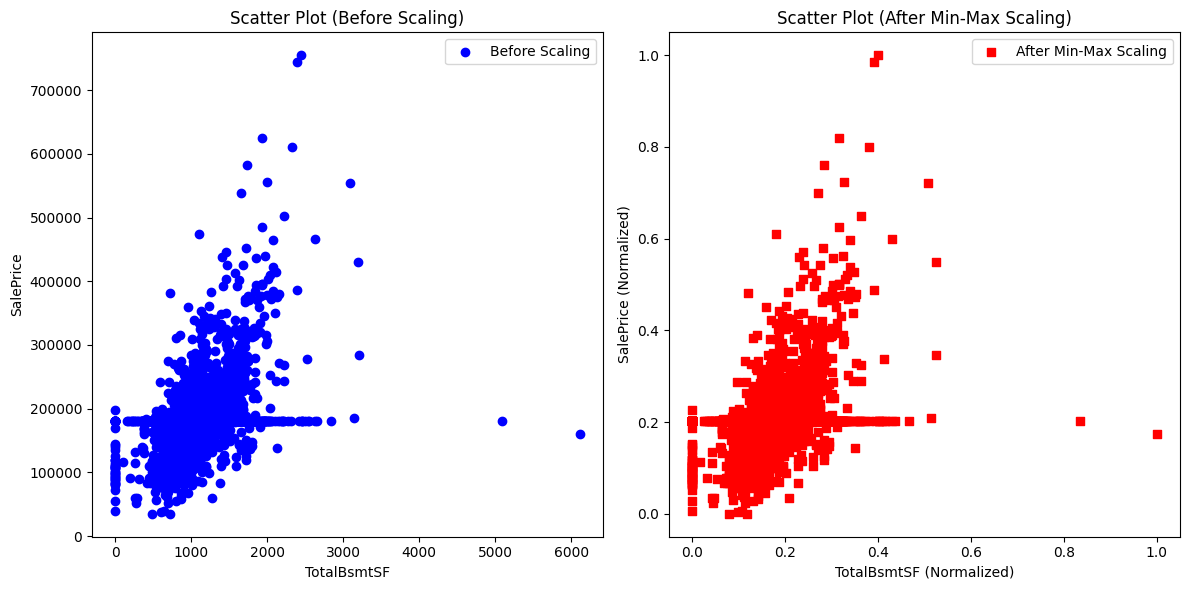

In [ ]:
# Scatter plot before normalization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data_subset['TotalBsmtSF'], data_subset['SalePrice'], c='b', marker='o', label='Before Scaling')
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.title('Scatter Plot (Before Scaling)')
plt.legend()

# Scatter plot after normalization
plt.subplot(1, 2, 2)
plt.scatter(data_normalized['TotalBsmtSF'], data_normalized['SalePrice'], c='r', marker='s', label='After Min-Max Scaling')
plt.xlabel('TotalBsmtSF (Normalized)')
plt.ylabel('SalePrice (Normalized)')
plt.title('Scatter Plot (After Min-Max Scaling)')
plt.legend()

plt.tight_layout()
plt.show()

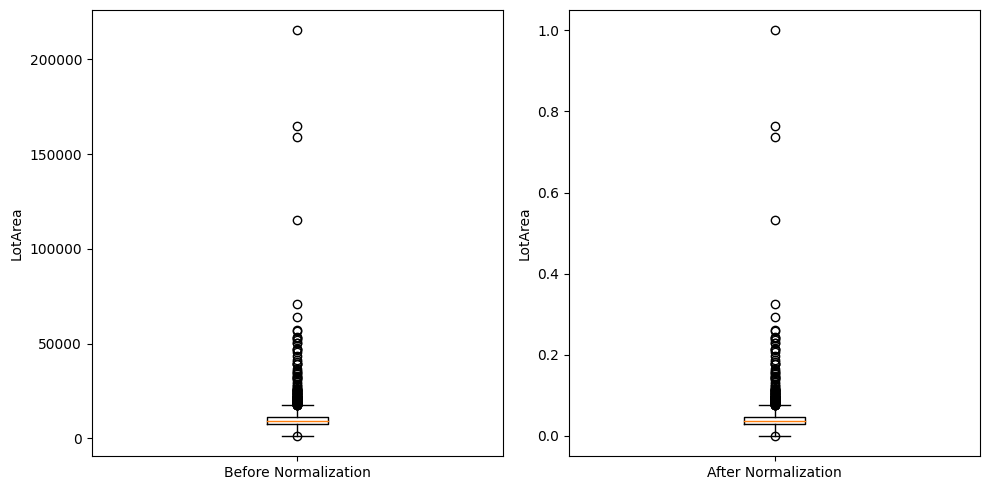

In [ ]:
# Create a figure with two subplots in one row
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# Create boxplots on the first subplot
axes[0].boxplot([data_subset['LotArea']], labels=['Before Normalization'])
axes[0].set_ylabel('LotArea')

# Create boxplots on the second subplot
axes[1].boxplot([ data_normalized['LotArea']], labels=['After Normalization'])
axes[1].set_ylabel('LotArea')

# Adjust layout to prevent overlap of labels and titles
plt.tight_layout()

# Show the plots
plt.show()


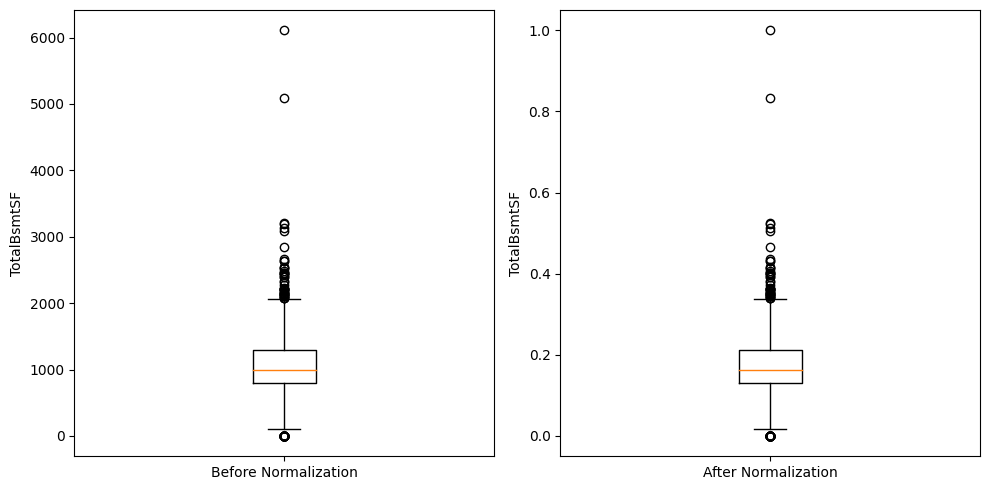

In [ ]:
# Create a figure with two subplots in one row
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# Create boxplots on the first subplot
axes[0].boxplot([data_subset['TotalBsmtSF']], labels=['Before Normalization'])
axes[0].set_ylabel('TotalBsmtSF')

# Create boxplots on the second subplot
axes[1].boxplot([ data_normalized['TotalBsmtSF']], labels=['After Normalization'])
axes[1].set_ylabel('TotalBsmtSF')

# Adjust layout to prevent overlap of labels and titles
plt.tight_layout()

# Show the plots
plt.show()


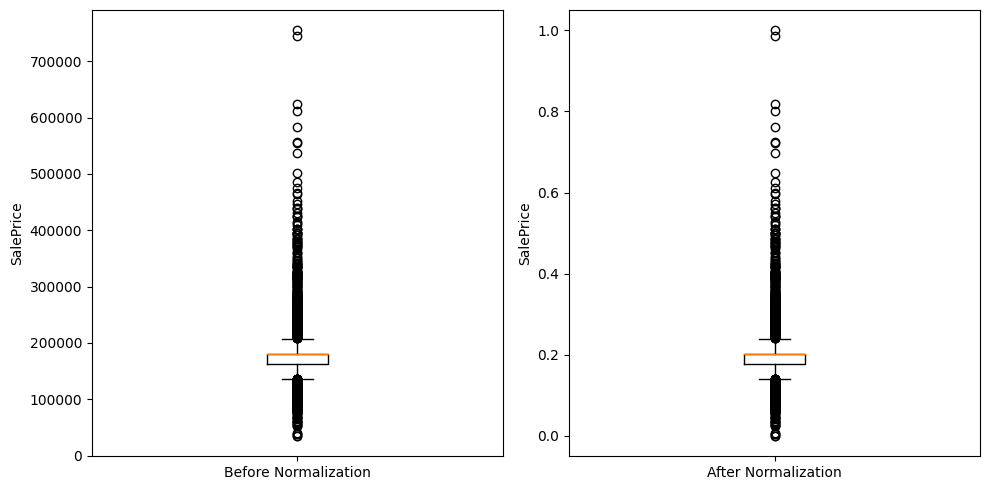

In [ ]:
# Create a figure with two subplots in one row
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# Create boxplots on the first subplot
axes[0].boxplot([data_subset['SalePrice']], labels=['Before Normalization'])
axes[0].set_ylabel('SalePrice')

# Create boxplots on the second subplot
axes[1].boxplot([ data_normalized['SalePrice']], labels=['After Normalization'])
axes[1].set_ylabel('SalePrice')

# Adjust layout to prevent overlap of labels and titles
plt.tight_layout()

# Show the plots
plt.show()


### Data Standardization

In [ ]:
def z_score_standardization(column):
    mean_val = column.mean()
    std_dev = column.std()
    standardized_column = (column - mean_val) / std_dev
    return standardized_column

data_standardized = data_subset.apply(z_score_standardization)

Data standardisation can be done through pre-built library functions also

```
from sklearn.preprocessing import StandardScaler

scaler_standard = StandardScaler()
data_standardized = scaler_standard.fit_transform(data_subset)
data_standardized = pd.DataFrame(data_standardized, columns=columns_to_normalize)
```



Visualizing Lot Area vs SalesPrice

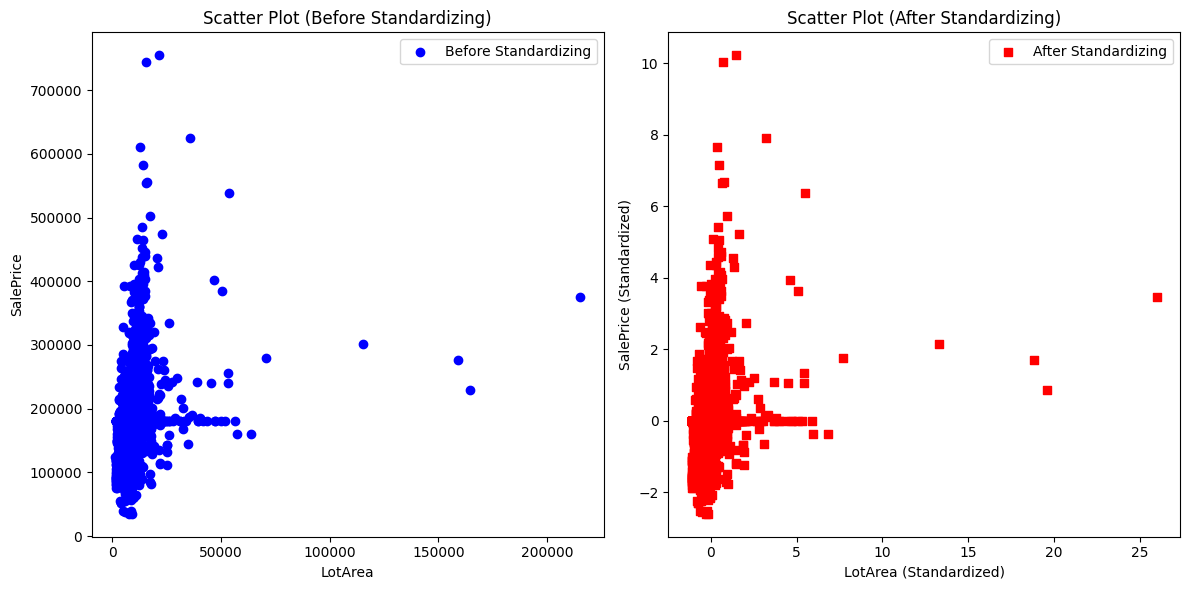

In [ ]:
# Scatter plot before standardization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data_subset['LotArea'], data_subset['SalePrice'], c='b', marker='o', label='Before Standardizing')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.title('Scatter Plot (Before Standardizing)')
plt.legend()

# Scatter plot after standardization
plt.subplot(1, 2, 2)
plt.scatter(data_standardized['LotArea'], data_standardized['SalePrice'], c='r', marker='s', label='After Standardizing')
plt.xlabel('LotArea (Standardized)')
plt.ylabel('SalePrice (Standardized)')
plt.title('Scatter Plot (After Standardizing)')
plt.legend()

plt.tight_layout()
plt.show()


Visualizing TotalBsmtSF vs SalesPrice

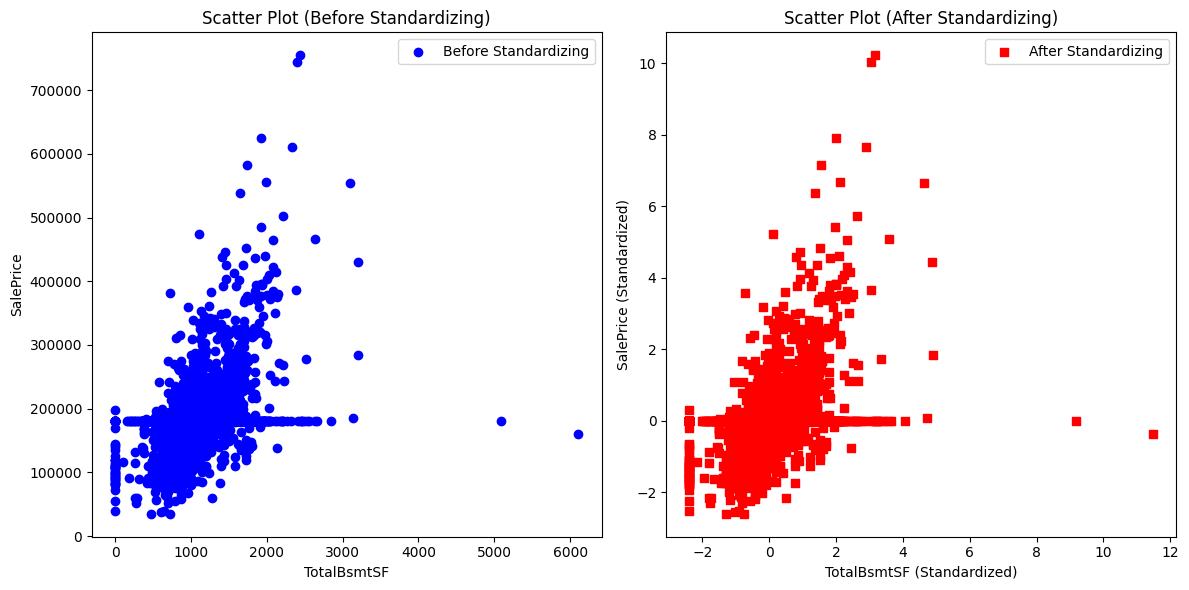

In [ ]:
# Scatter plot before standardization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data_subset['TotalBsmtSF'], data_subset['SalePrice'], c='b', marker='o', label='Before Standardizing')
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.title('Scatter Plot (Before Standardizing)')
plt.legend()

# Scatter plot after standardization
plt.subplot(1, 2, 2)
plt.scatter(data_standardized['TotalBsmtSF'], data_standardized['SalePrice'], c='r', marker='s', label='After Standardizing')
plt.xlabel('TotalBsmtSF (Standardized)')
plt.ylabel('SalePrice (Standardized)')
plt.title('Scatter Plot (After Standardizing)')
plt.legend()

plt.tight_layout()
plt.show()

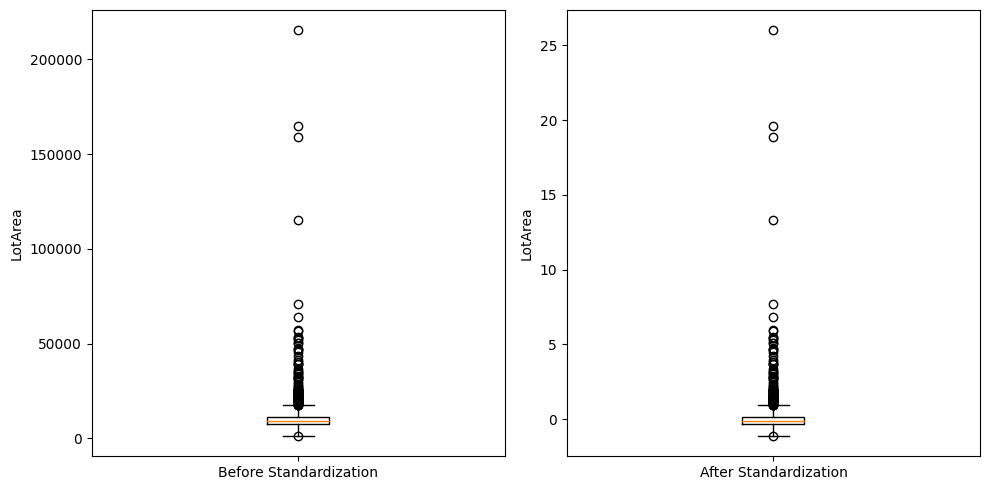

In [ ]:
# Create a figure with two subplots in one row
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# Create boxplots on the first subplot
axes[0].boxplot([data_subset['LotArea']], labels=['Before Standardization'])
axes[0].set_ylabel('LotArea')

# Create boxplots on the second subplot
axes[1].boxplot([data_standardized['LotArea']], labels=['After Standardization'])
axes[1].set_ylabel('LotArea')

# Adjust layout to prevent overlap of labels and titles
plt.tight_layout()

# Show the plots
plt.show()


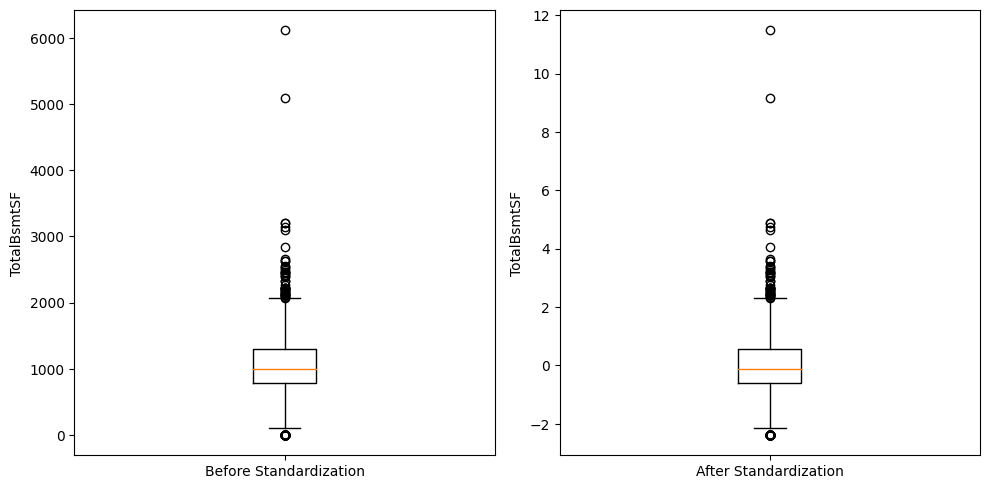

In [ ]:
# Create a figure with two subplots in one row
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# Create boxplots on the first subplot
axes[0].boxplot([data_subset['TotalBsmtSF']], labels=['Before Standardization'])
axes[0].set_ylabel('TotalBsmtSF')

# Create boxplots on the second subplot
axes[1].boxplot([data_standardized['TotalBsmtSF']], labels=['After Standardization'])
axes[1].set_ylabel('TotalBsmtSF')

# Adjust layout to prevent overlap of labels and titles
plt.tight_layout()

# Show the plots
plt.show()


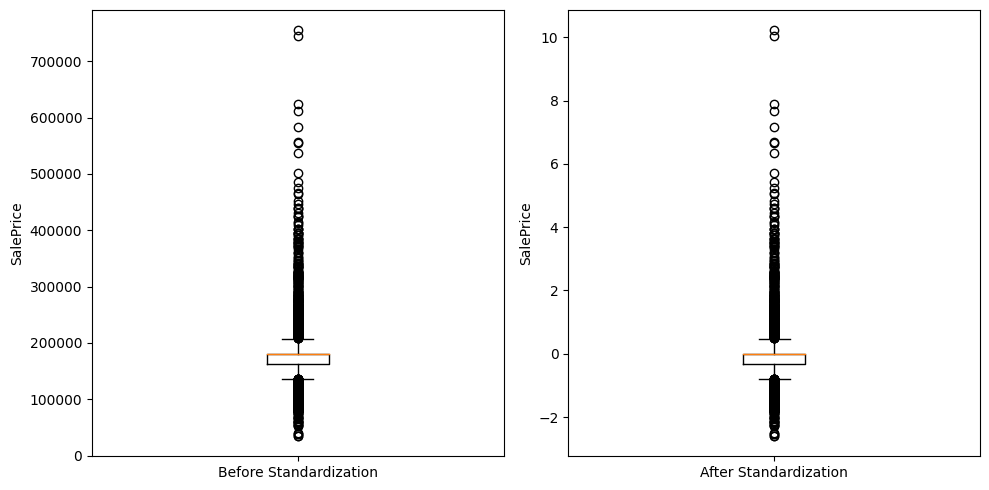

In [ ]:
# Create a figure with two subplots in one row
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# Create boxplots on the first subplot
axes[0].boxplot([data_subset['SalePrice']], labels=['Before Standardization'])
axes[0].set_ylabel('SalePrice')

# Create boxplots on the second subplot
axes[1].boxplot([data_standardized['SalePrice']], labels=['After Standardization'])
axes[1].set_ylabel('SalePrice')

# Adjust layout to prevent overlap of labels and titles
plt.tight_layout()

# Show the plots
plt.show()


# Computing and visualizing the relation between attributes

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Importing Dataset from the Location
Data = pd.read_csv( "/content/drive/MyDrive/PhD/TAShip/IC-272_2023/Tutorials/Tutorial-01/HousePricePrediction.csv" )

# Dropping coloums based on index
# Data.drop(Data.columns[[0, 4, 5, 9, 2]], axis=1, inplace=True)

# Dropping using Specific multiple columns
Data=Data.drop( ['Id','MSZoning','LotConfig','BldgType','Exterior1st'] , axis=1 )

In [ ]:
# Selectring Data Frame to work as a covariance matrix
DF = Data[:1460]
print(DF)
DF.shape

      MSSubClass  LotArea  OverallCond  YearBuilt  YearRemodAdd  BsmtFinSF2  \
0             60     8450            5       2003          2003         0.0   
1             20     9600            8       1976          1976         0.0   
2             60    11250            5       2001          2002         0.0   
3             70     9550            5       1915          1970         0.0   
4             60    14260            5       2000          2000         0.0   
...          ...      ...          ...        ...           ...         ...   
1455          60     7917            5       1999          2000         0.0   
1456          20    13175            6       1978          1988       163.0   
1457          70     9042            9       1941          2006         0.0   
1458          20     9717            6       1950          1996      1029.0   
1459          20     9937            6       1965          1965       290.0   

      TotalBsmtSF  SalePrice  
0           856.0   

(1460, 8)

In [ ]:
# Finding our Covairanve matrix to find Correlation
CovarianceMatrix= DF.cov()
print(CovarianceMatrix)

                 MSSubClass       LotArea  OverallCond     YearBuilt  \
MSSubClass      1789.338306 -5.901742e+04    -2.792117  3.558134e+01   
LotArea       -59017.418634  9.962565e+07   -62.602871  4.289113e+03   
OverallCond       -2.792117 -6.260287e+01     1.238322 -1.263671e+01   
YearBuilt         35.581337  4.289113e+03   -12.636709  9.122154e+02   
YearRemodAdd      35.439934  2.841344e+03     1.694152  3.696755e+02   
BsmtFinSF2      -447.979166  1.790022e+05     7.221779 -2.392637e+02   
TotalBsmtSF    -4426.301975  1.142145e+06   -83.528266  5.186807e+03   
SalePrice    -283233.737229  2.092111e+08 -6882.738552  1.254637e+06   

               YearRemodAdd     BsmtFinSF2   TotalBsmtSF     SalePrice  
MSSubClass        35.439934    -447.979166 -4.426302e+03 -2.832337e+05  
LotArea         2841.343594  179002.233638  1.142145e+06  2.092111e+08  
OverallCond        1.694152       7.221779 -8.352827e+01 -6.882739e+03  
YearBuilt        369.675456    -239.263730  5.186807e+03  1

In [ ]:
#Using the covariance matrix to get the correlation matrix
#calculating standard deviation using the diagnol elements of the covariance matrix
std_devs = np.sqrt(np.diag(CovarianceMatrix))
correlation_matrix = CovarianceMatrix / np.outer(std_devs, std_devs)
print(correlation_matrix)



              MSSubClass   LotArea  OverallCond  YearBuilt  YearRemodAdd  \
MSSubClass      1.000000 -0.139781    -0.059316   0.027850      0.040581   
LotArea        -0.139781  1.000000    -0.005636   0.014228      0.013788   
OverallCond    -0.059316 -0.005636     1.000000  -0.375983      0.073741   
YearBuilt       0.027850  0.014228    -0.375983   1.000000      0.592855   
YearRemodAdd    0.040581  0.013788     0.073741   0.592855      1.000000   
BsmtFinSF2     -0.065649  0.111170     0.040229  -0.049107     -0.067759   
TotalBsmtSF    -0.238518  0.260833    -0.171098   0.391452      0.291066   
SalePrice      -0.084284  0.263843    -0.077856   0.522897      0.507101   

              BsmtFinSF2  TotalBsmtSF  SalePrice  
MSSubClass     -0.065649    -0.238518  -0.084284  
LotArea         0.111170     0.260833   0.263843  
OverallCond     0.040229    -0.171098  -0.077856  
YearBuilt      -0.049107     0.391452   0.522897  
YearRemodAdd   -0.067759     0.291066   0.507101  
BsmtFinSF

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

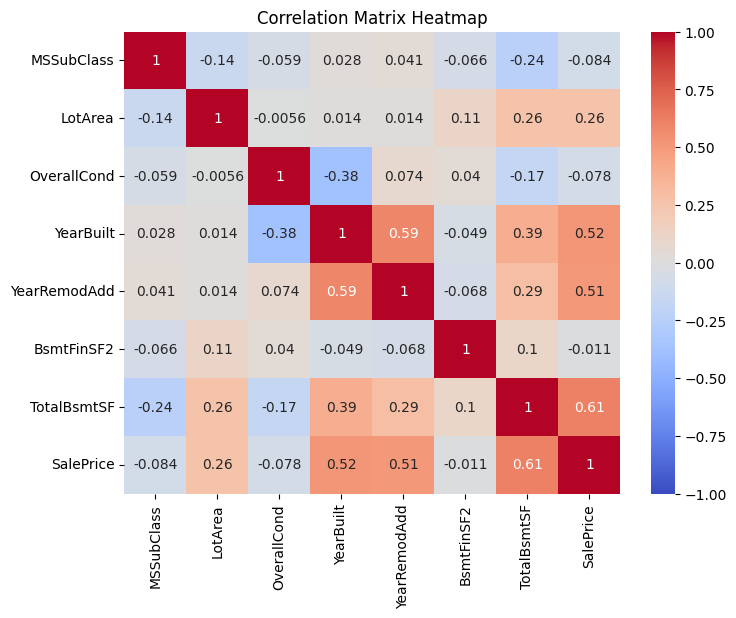

In [ ]:
#Heat map of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()